In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import dlib
import cv2
import os
import re
import json
from pylab import *
from PIL import Image, ImageChops, ImageEnhance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/DAI_project/DFDC/deepfake-detection-challenge.zip'

Archive:  /content/drive/MyDrive/DAI_project/DFDC/deepfake-detection-challenge.zip
   creating: deepfake-detection-challenge/
  inflating: __MACOSX/._deepfake-detection-challenge  
   creating: deepfake-detection-challenge/train_sample_videos/
  inflating: __MACOSX/deepfake-detection-challenge/._train_sample_videos  
   creating: deepfake-detection-challenge/test_videos/
  inflating: __MACOSX/deepfake-detection-challenge/._test_videos  
  inflating: deepfake-detection-challenge/sample_submission.csv  
  inflating: __MACOSX/deepfake-detection-challenge/._sample_submission.csv  
  inflating: deepfake-detection-challenge/train_sample_videos/cdaxixbosp.mp4  
  inflating: __MACOSX/deepfake-detection-challenge/train_sample_videos/._cdaxixbosp.mp4  
  inflating: deepfake-detection-challenge/train_sample_videos/btiysiskpf.mp4  
  inflating: __MACOSX/deepfake-detection-challenge/train_sample_videos/._btiysiskpf.mp4  
  inflating: deepfake-detection-challenge/train_sample_videos/clihsshdkq.mp4  

In [ ]:
import os
import cv2
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
input_shape = (128, 128, 3)
data_dir = '/content/drive/MyDrive/DAI_project/DFDC/dataset'

real_data = [f for f in os.listdir(data_dir+'/real') if f.endswith('.png')]
fake_data = [f for f in os.listdir(data_dir+'/fake') if f.endswith('.png')]

X = []
Y = []

for img in real_data:
    X.append(img_to_array(load_img(data_dir+'/real/'+img)).flatten() / 255.0)
    Y.append(1)
for img in fake_data:
    X.append(img_to_array(load_img(data_dir+'/fake/'+img)).flatten() / 255.0)
    Y.append(0)

Y_val_org = Y

#Normalization
X = np.array(X)
Y = to_categorical(Y, 2)

#Reshape
X = X.reshape(-1, 128, 128, 3)

#Train-Test split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)

## try 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import cv2
plt.style.use('ggplot')
from IPython.display import Video
from IPython.display import HTML

In [ ]:
train_sample_metadata = pd.read_json('/content/deepfake-detection-challenge/train_sample_videos/metadata.json').T
train_sample_metadata.head()

label  split        original
aagfhgtpmv.mp4  FAKE  train  vudstovrck.mp4
aapnvogymq.mp4  FAKE  train  jdubbvfswz.mp4
abarnvbtwb.mp4  REAL  train            None
abofeumbvv.mp4  FAKE  train  atvmxvwyns.mp4
abqwwspghj.mp4  FAKE  train  qzimuostzz.mp4

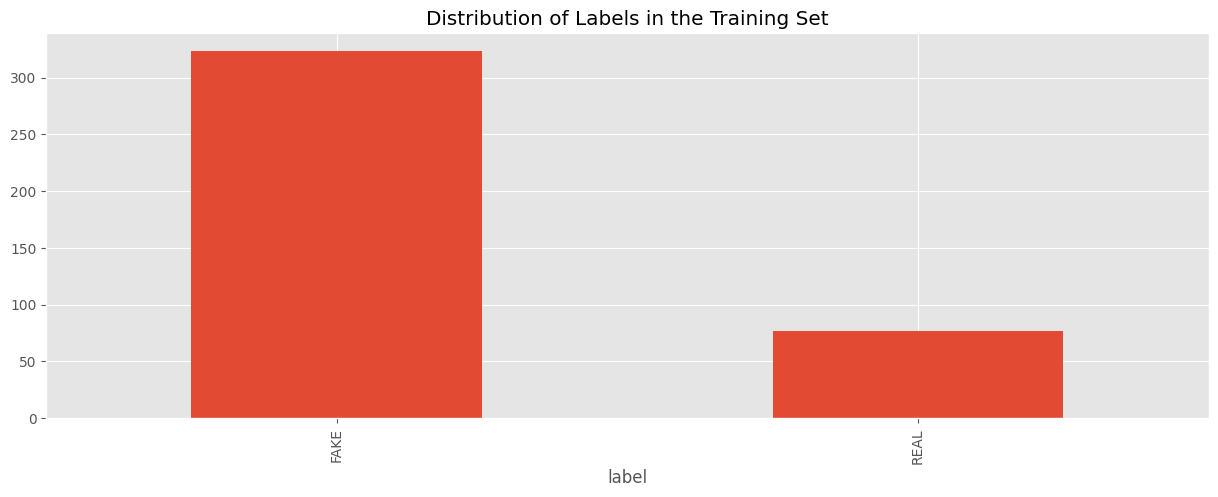

In [ ]:
train_sample_metadata.groupby('label')['label'].count().plot(figsize=(15, 5), kind='bar', title='Distribution of Labels in the Training Set')
plt.show()

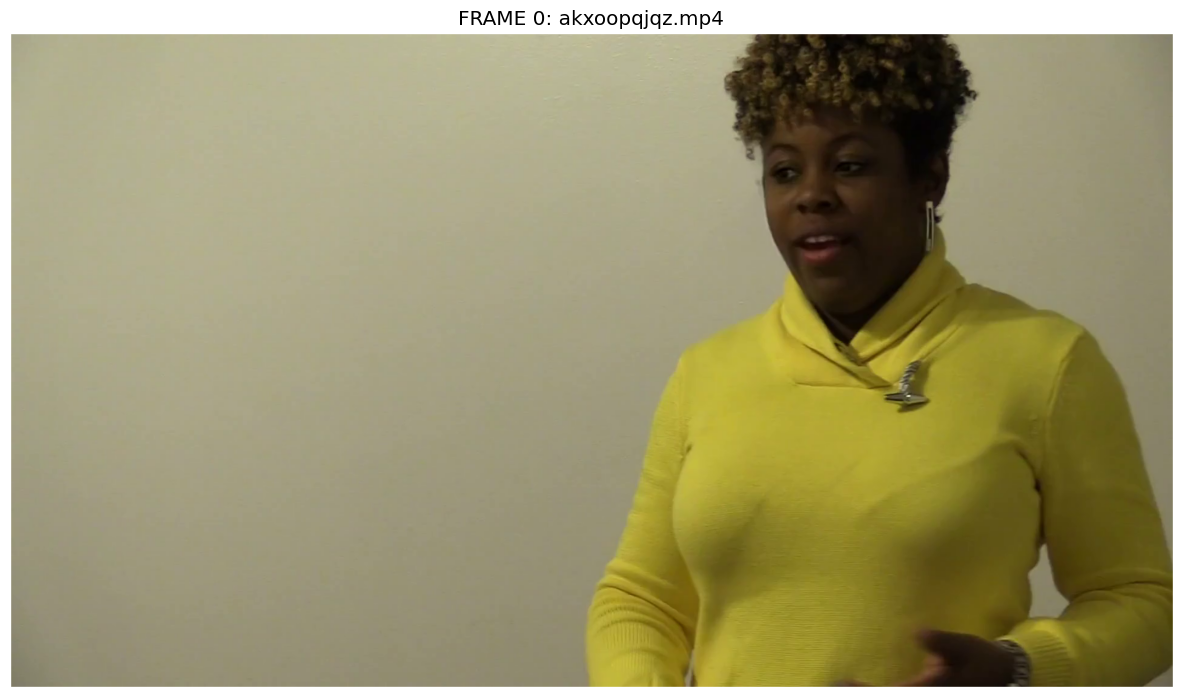

In [ ]:
import cv2 as cv
import os
import matplotlib.pylab as plt
train_dir = '/content/deepfake-detection-challenge/train_sample_videos/'
fig, ax = plt.subplots(1,1, figsize=(15, 15))
train_video_files = [train_dir + x for x in os.listdir(train_dir)]
# video_file = train_video_files[30]
video_file = '/content/deepfake-detection-challenge/train_sample_videos/akxoopqjqz.mp4'
cap = cv.VideoCapture(video_file)
success, image = cap.read()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cap.release()   
ax.imshow(image)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.title.set_text(f"FRAME 0: {video_file.split('/')[-1]}")
plt.grid(False)

In [ ]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=43da44d17ceda74b904886571e73103fe2fcaa1de3c9a16a8897468ad2dd88ad
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


### locating a face within an image

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 99, Left: 1168, Bottom: 420, Right: 1489


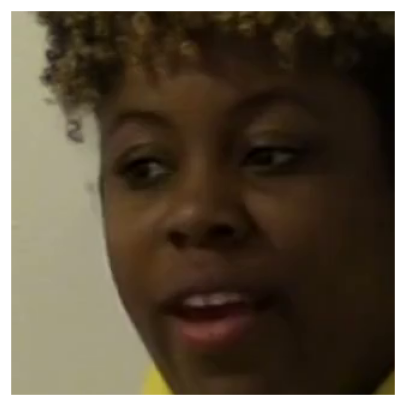

In [ ]:
import face_recognition
face_locations = face_recognition.face_locations(image)

# https://github.com/ageitgey/face_recognition/blob/master/examples/find_faces_in_picture.py
from PIL import Image

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    plt.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(face_image)

### locating a face landmarks within an image

In [ ]:
face_landmarks_list = face_recognition.face_landmarks(image)

The chin in this face has the following points: [(1247, 239), (1245, 268), (1247, 297), (1255, 328), (1268, 358), (1285, 387), (1304, 416), (1323, 438), (1350, 445), (1383, 439), (1419, 423), (1453, 399), (1482, 370), (1501, 335), (1507, 295), (1505, 256), (1501, 219)]
The left_eyebrow in this face has the following points: [(1251, 198), (1257, 185), (1272, 181), (1288, 183), (1304, 190)]
The right_eyebrow in this face has the following points: [(1342, 184), (1362, 171), (1386, 165), (1411, 170), (1432, 181)]
The nose_bridge in this face has the following points: [(1324, 219), (1323, 235), (1320, 250), (1319, 267)]
The nose_tip in this face has the following points: [(1301, 294), (1313, 298), (1327, 299), (1343, 296), (1358, 293)]
The left_eye in this face has the following points: [(1264, 234), (1273, 227), (1287, 226), (1303, 230), (1289, 235), (1275, 237)]
The right_eye in this face has the following points: [(1365, 224), (1378, 215), (1394, 215), (1410, 219), (1395, 224), (1379, 22

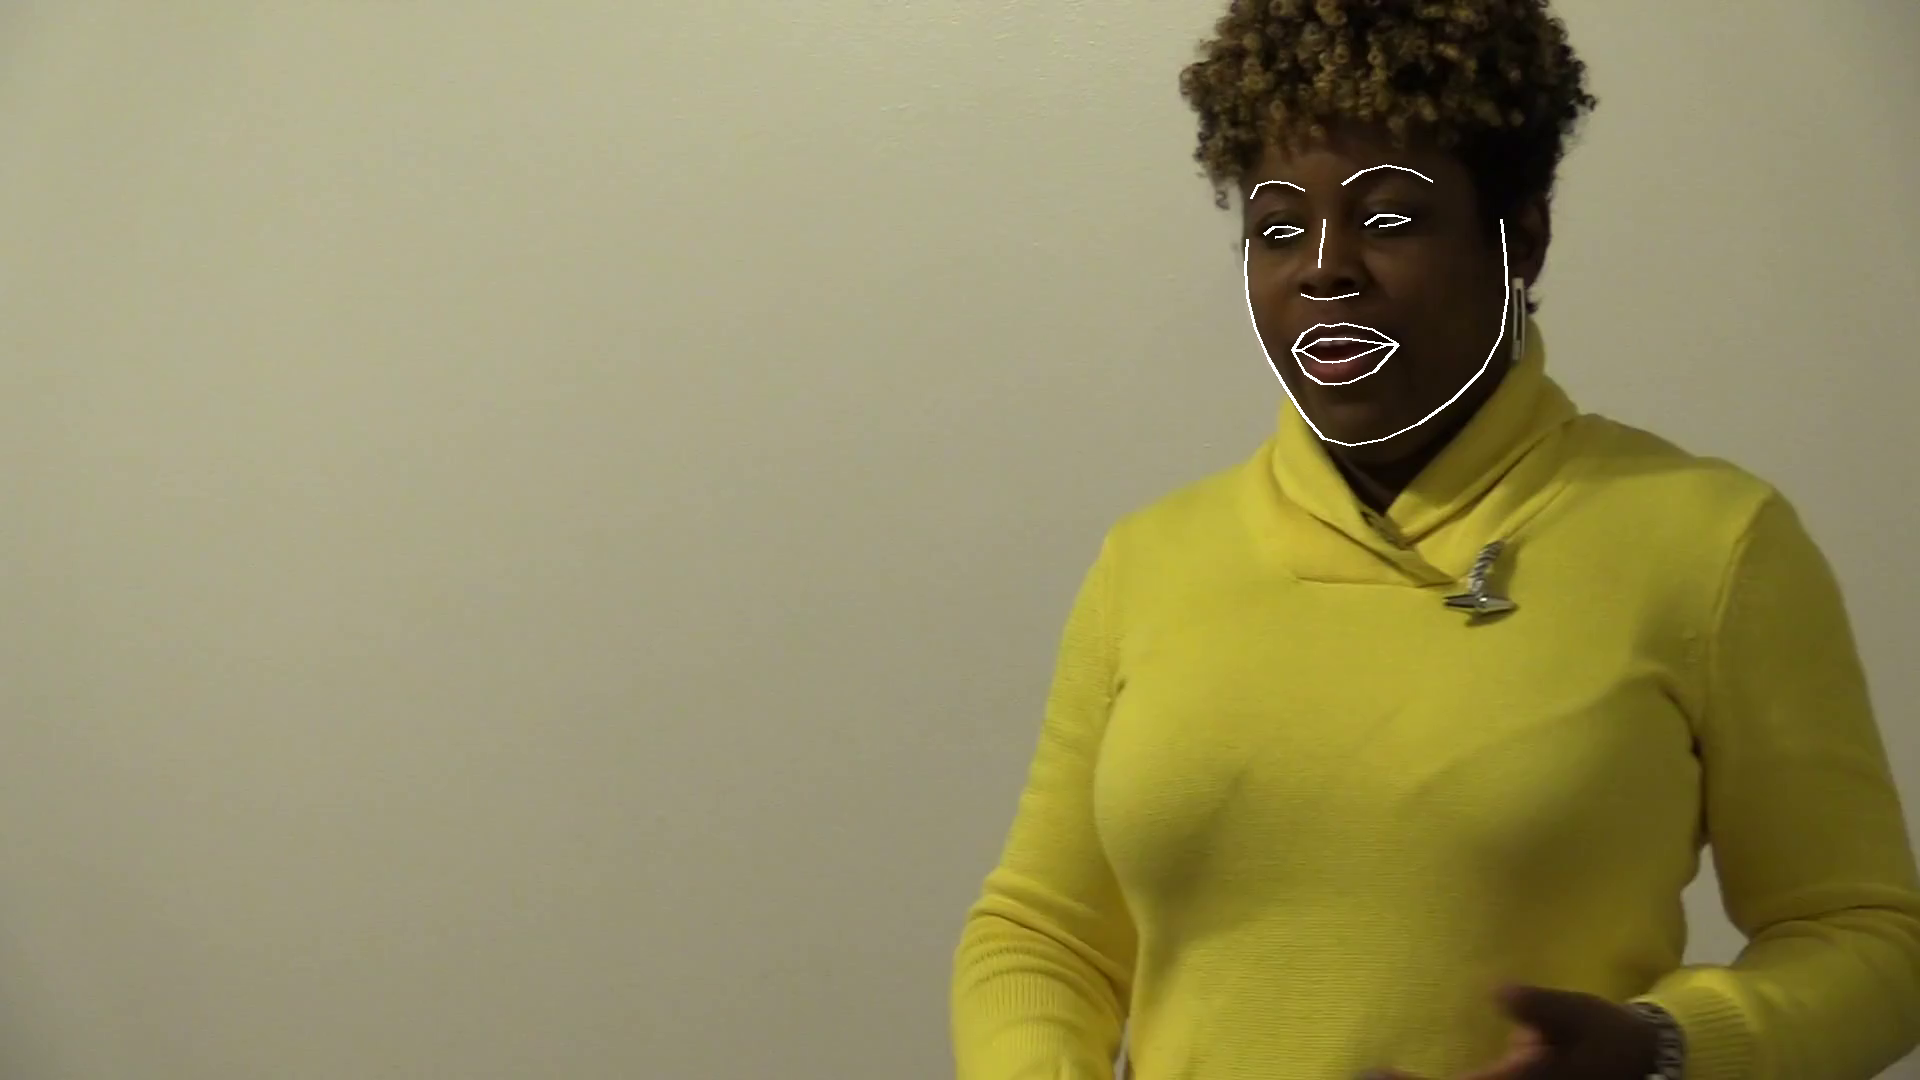

In [ ]:
# https://github.com/ageitgey/face_recognition/blob/master/examples/find_facial_features_in_picture.py
# face_landmarks_list
from PIL import Image, ImageDraw
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3)

# Show the picture
display(pil_image)

### some more samples and adding padding to zoom out face

In [ ]:
print(train_sample_metadata.index)

Index(['aagfhgtpmv.mp4', 'aapnvogymq.mp4', 'abarnvbtwb.mp4', 'abofeumbvv.mp4',
       'abqwwspghj.mp4', 'acifjvzvpm.mp4', 'acqfdwsrhi.mp4', 'acxnxvbsxk.mp4',
       'acxwigylke.mp4', 'aczrgyricp.mp4',
       ...
       'esnntzzajv.mp4', 'esxrvsgpvb.mp4', 'esyhwdfnxs.mp4', 'esyrimvzsa.mp4',
       'etdcqxabww.mp4', 'etejaapnxh.mp4', 'etmcruaihe.mp4', 'etohcvnzbj.mp4',
       'eudeqjhdfd.mp4', 'eukvucdetx.mp4'],
      dtype='object', length=400)


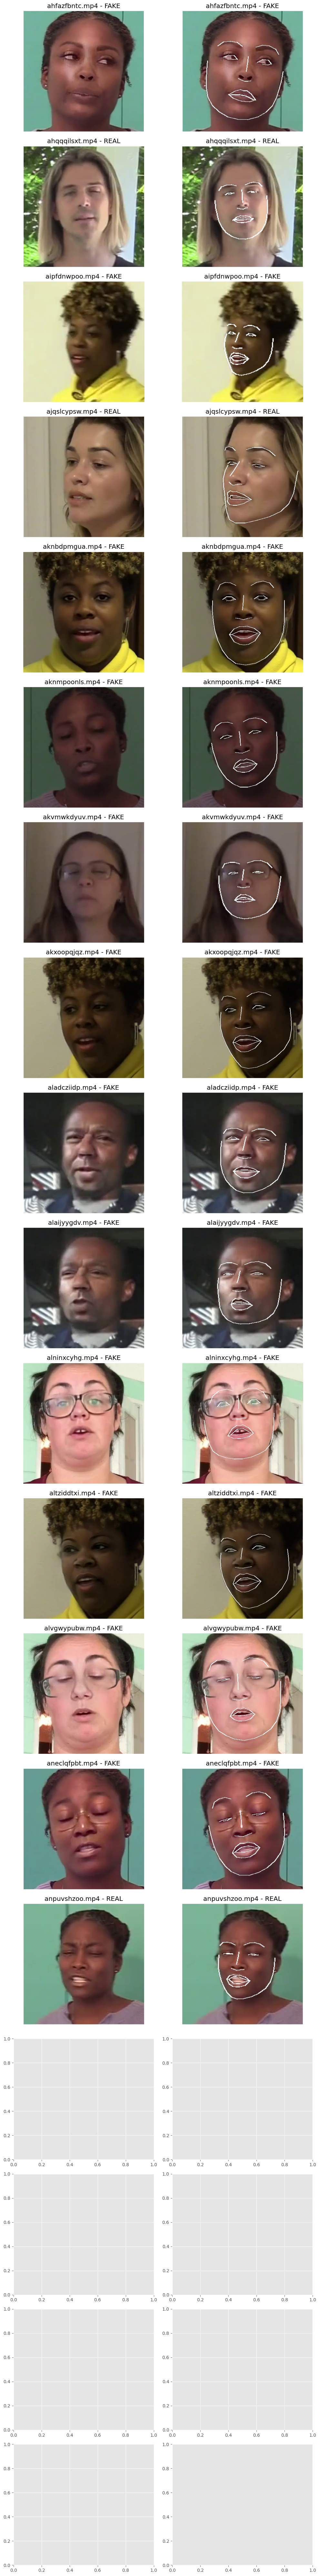

In [ ]:
fig, axs = plt.subplots(19, 2, figsize=(10, 80))
axs = np.array(axs)
axs = axs.reshape(-1)
i = 0
pad = 60
for fn in train_sample_metadata.index[23:44]:
    label = train_sample_metadata.loc[fn]['label']
    orig = train_sample_metadata.loc[fn]['label']
    video_file = f'/content/deepfake-detection-challenge/train_sample_videos/{fn}'
    ax = axs[i]
    cap = cv.VideoCapture(video_file)
    success, image = cap.read()
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) > 0:
        # Print first face
        face_location = face_locations[0]
        top, right, bottom, left = face_location
        face_image = image[top-pad:bottom+pad, left-pad:right+pad]
        ax.imshow(face_image)
        ax.grid(False)
        ax.title.set_text(f'{fn} - {label}')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        # Find landmarks
        face_landmarks_list = face_recognition.face_landmarks(face_image)
        try:
            face_landmarks = face_landmarks_list[0]
            pil_image = Image.fromarray(face_image)
            d = ImageDraw.Draw(pil_image)
            for facial_feature in face_landmarks.keys():
                d.line(face_landmarks[facial_feature], width=2, fill='white')
            landmark_face_array = np.array(pil_image)
            ax2 = axs[i+1]
            ax2.imshow(landmark_face_array)
            ax2.grid(False)
            ax2.title.set_text(f'{fn} - {label}')
            ax2.xaxis.set_visible(False)
            ax2.yaxis.set_visible(False)
            i += 2
        except:
            pass
plt.grid(False)
plt.tight_layout()
plt.show()

### Frame by Frame Face Detection

In [ ]:
video_file = '/content/deepfake-detection-challenge/train_sample_videos/akxoopqjqz.mp4'

cap = cv2.VideoCapture(video_file)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frames.append(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()

print('The number of frames saved: ', len(frames))

The number of frames saved:  300


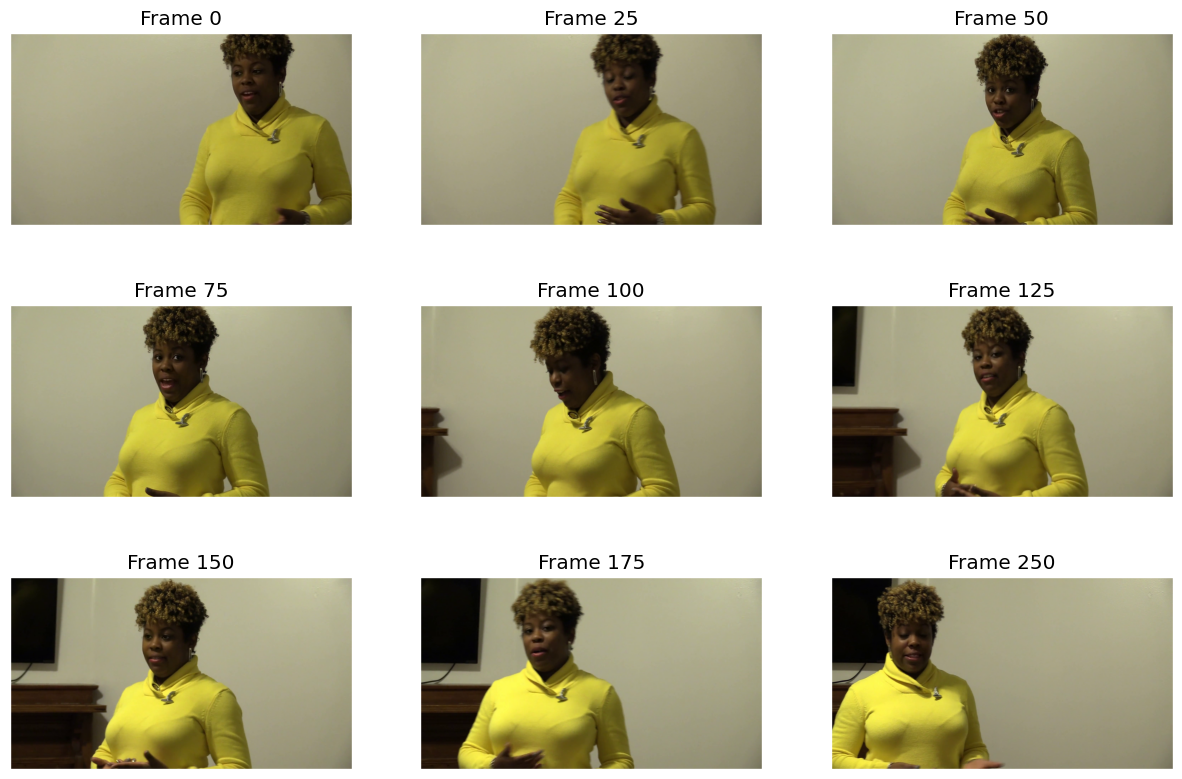

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = np.array(axes)
axes = axes.reshape(-1)

ax_ix = 0
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    axes[ax_ix].set_title(f'Frame {i}')
    ax_ix += 1
plt.grid(False)
plt.show()

Now we can use the face detection to pull the faces from each frame in the video. Notice that the face coun't be detected for one of the frames.

Could not find face in frame 100


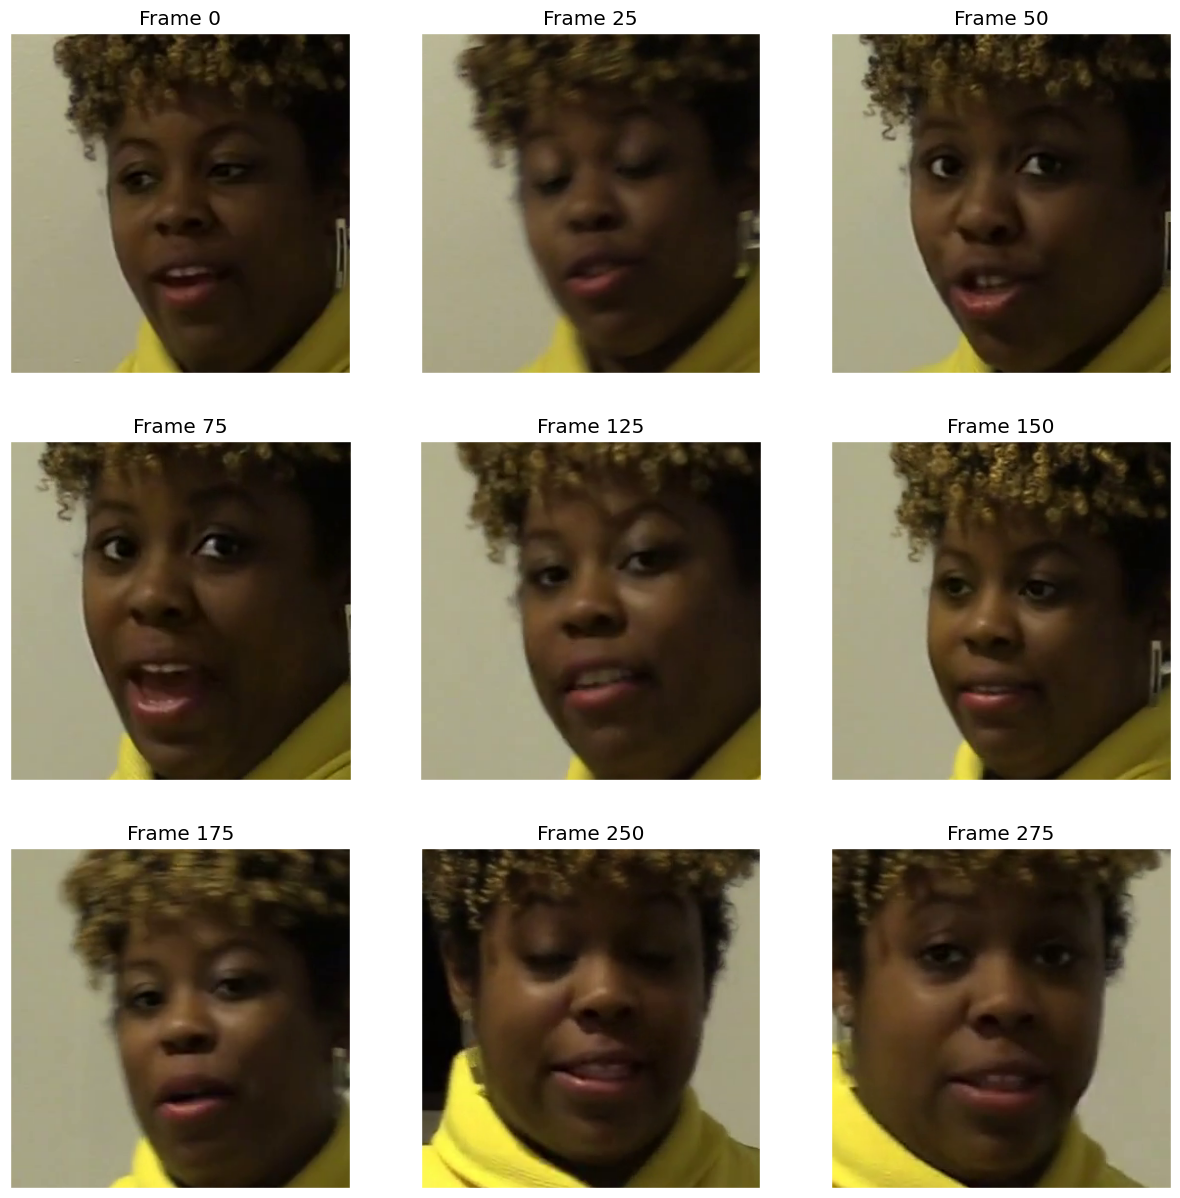

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250, 275]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Could not find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    image = cv.cvtColor(frame_face, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    axes[ax_ix].set_title(f'Frame {i}')
    ax_ix += 1
plt.grid(False)
plt.show()

### plotting facial landmarks for each frame

Could not identify face landmarks for frame 25
Could not identify face landmarks for frame 50
Could not identify face landmarks for frame 75
Count find face in frame 100
Could not identify face landmarks for frame 125
Could not identify face landmarks for frame 150
Could not identify face landmarks for frame 175
Could not identify face landmarks for frame 250
Could not identify face landmarks for frame 275


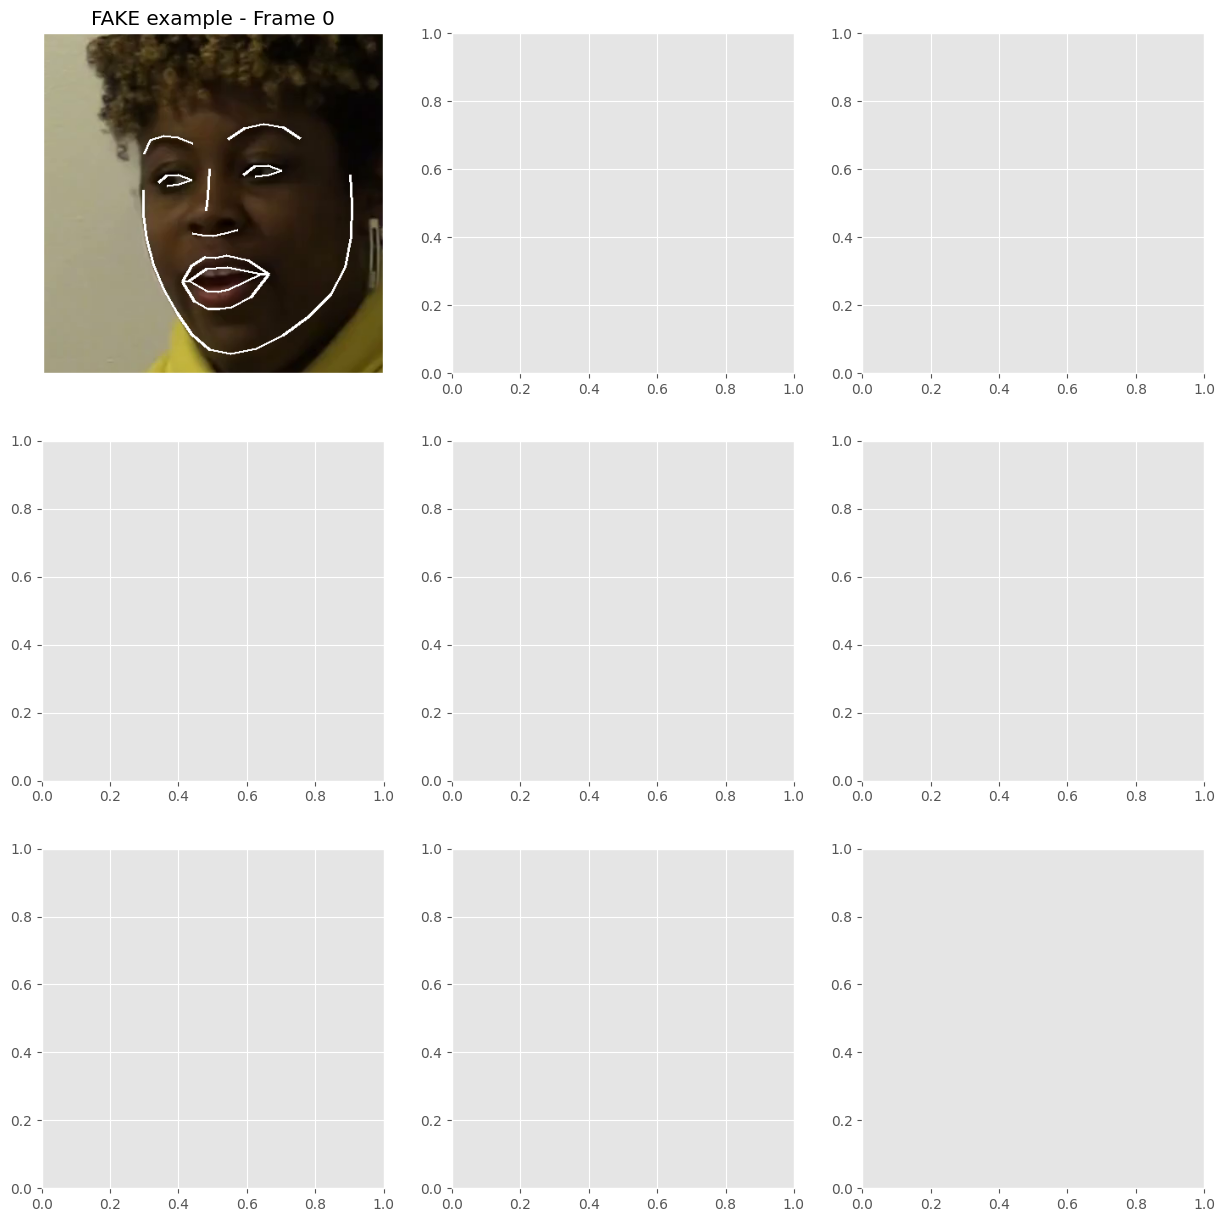

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250, 275]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Count find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    face_landmarks_list = face_recognition.face_landmarks(frame_face)
    if len(face_landmarks_list) == 0:
        print(f'Could not identify face landmarks for frame {i}')
        continue
    face_landmarks = face_landmarks_list[0]
    pil_image = Image.fromarray(frame_face)
    d = ImageDraw.Draw(pil_image)
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3, fill='white')
    landmark_face_array = np.array(pil_image)
    image = cv.cvtColor(landmark_face_array, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].grid(False)
    axes[ax_ix].set_title(f'FAKE example - Frame {i}')
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    ax_ix += 1
plt.grid(False)
plt.show()

### frame by frame for real example

The number of frames saved:  300
Could not identify face landmarks for frame 25
Could not identify face landmarks for frame 50
Could not identify face landmarks for frame 75
Could not identify face landmarks for frame 100
Could not identify face landmarks for frame 125
Could not identify face landmarks for frame 150
Could not identify face landmarks for frame 175
Could not identify face landmarks for frame 250
Could not identify face landmarks for frame 275


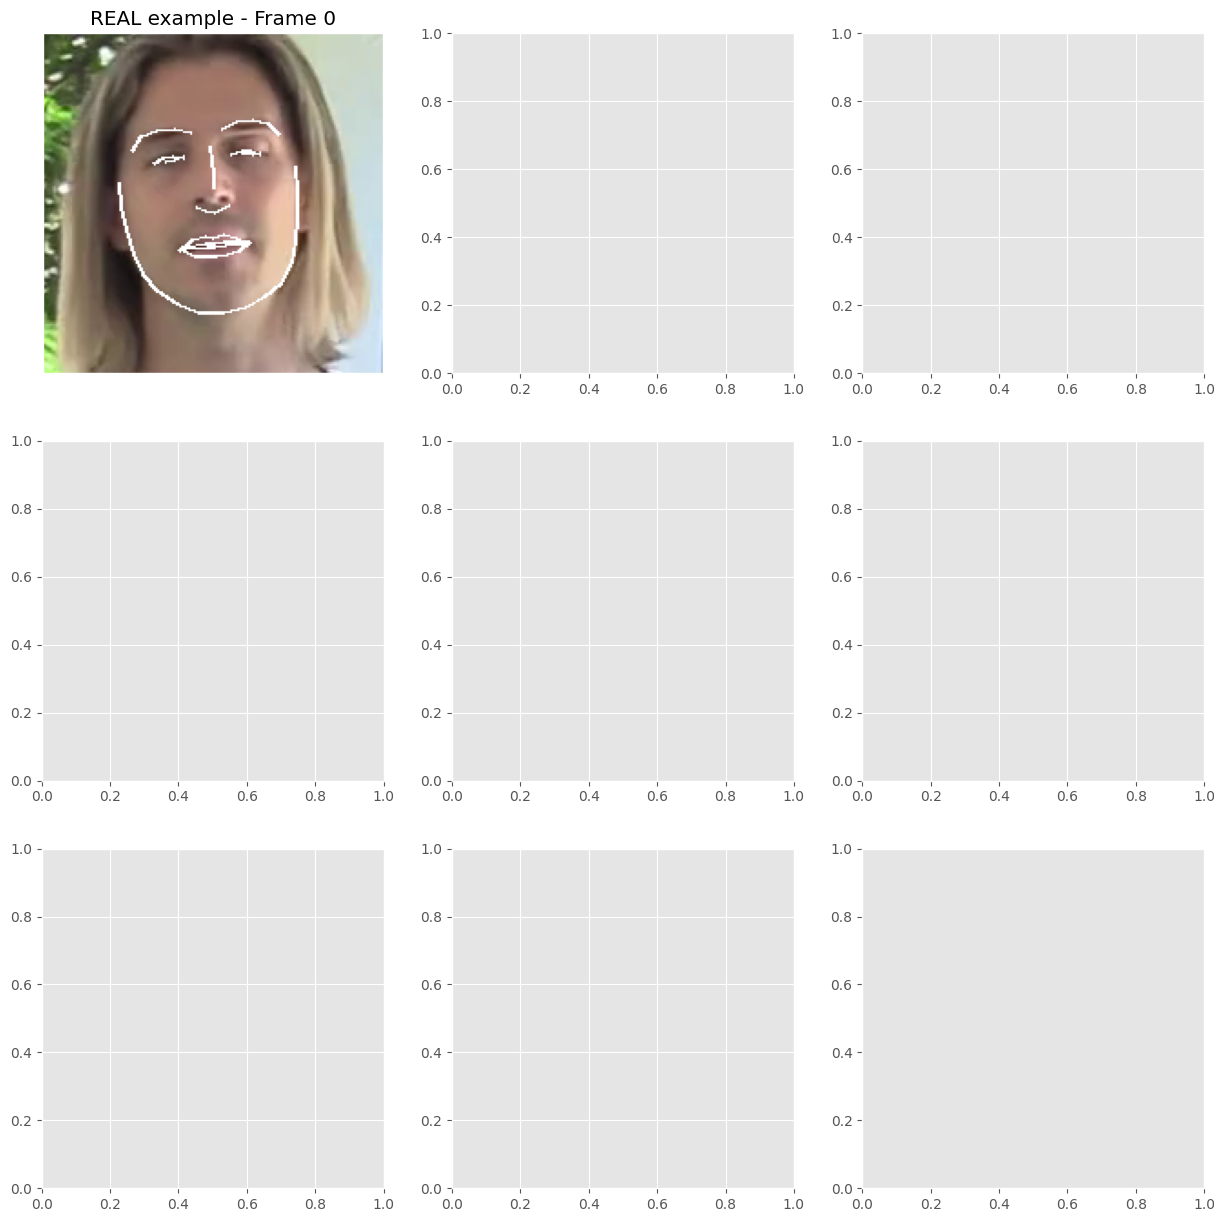

In [ ]:
fn = 'ahqqqilsxt.mp4'
video_file = f'/content/deepfake-detection-challenge/train_sample_videos/{fn}'

cap = cv2.VideoCapture(video_file)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frames.append(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()

print('The number of frames saved: ', len(frames))

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250, 275]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Count find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    face_landmarks_list = face_recognition.face_landmarks(frame_face)
    if len(face_landmarks_list) == 0:
        print(f'Could not identify face landmarks for frame {i}')
        continue
    face_landmarks = face_landmarks_list[0]
    pil_image = Image.fromarray(frame_face)
    d = ImageDraw.Draw(pil_image)
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=2, fill='white')
    landmark_face_array = np.array(pil_image)
    image = cv.cvtColor(landmark_face_array, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].grid(False)
    axes[ax_ix].set_title(f'REAL example - Frame {i}')
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    ax_ix += 1
    if ax_ix >= len(axes):
        break
plt.grid(False)
plt.show()